In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd gdrive/MyDrive/project

/content/gdrive/MyDrive/project


In [ ]:
# Install python libraries
!pip install -r requirements.txt
!pip install 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'

# Install detectron2
!python setup.py build develop


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/fvcore.git to /tmp/pip-req-build-dw02aewm
  Running command git clone -q https://github.com/facebookresearch/fvcore.git /tmp/pip-req-build-dw02aewm
     |████████████████████████████████| 753.4 MB 19 kB/s 
     |████████████████████████████████| 4.0 MB 52.6 MB/s 
     |████████████████████████████████| 2.0 MB 52.8 MB/s 
     |████████████████████████████████| 42 kB 1.1 MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.5-py3-none-any.whl size=65367 sha256=84d128cc115823ab40ad1da035a74e509e9191b41126977ec332f8bf99c5c3b7
  Stored in directory: /tmp/pip-ephem-wheel-cache-tqeww08o/wheels/1c/a9/3c/ff2edce1a1295c72dfff759833097cb1d7713d2f09672d4dd1
  Created wheel for Cython: filename=Cython-0.29.3-cp38-cp38-linux_x86_64.whl size=4868473 sha256=6edbc7a6c4f954d89cfa654e2d463fdee77b95218e536528b4d0e840c182d902
  Stored in directory: /root/.cache/pi

In [ ]:
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from IPython.display import clear_output, Image, display
import PIL.Image
import io
import os
import json
import matplotlib.pyplot as plt


vg_classes = []
with open('objects_vocab.txt') as f:
    for object in f.readlines():
        vg_classes.append(object.split(',')[0].lower().strip())

MetadataCatalog.get("vg").thing_classes = vg_classes


In [ ]:
def showarray(a, fmt='jpeg'):
    a = np.uint8(np.clip(a, 0, 255))
    f = io.BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data=f.getvalue()))



In [ ]:
from image import *
import cv2
IMG_FILE = "./frisbee.jpg"

cfg_file = "configs/VG-Detection/faster_rcnn_R_101_C4_caffemaxpool_wrapper.yaml"

im = cv2.imread(IMG_FILE)
model = FasterRCNNBottomUp(cfg_file)
predictions, boxes = model(im)
torch.save(boxes, "frisbee_boxes.pt")

Modifications for VG in ResNet Backbone (modeling/backbone/resnet.py):
	Using pad 0 in stem max_pool instead of pad 1.

Modifications for VG in RPN (modeling/proposal_generator/rpn.py):
	Use hidden dim 512 instead fo the same dim as Res4 (1024).

Modifications for VG in RoI heads (modeling/roi_heads/roi_heads.py):
	1. Change the stride of conv1 and shortcut in Res5.Block1 from 2 to 1.
	2. Modifying all conv2 with (padding: 1 --> 2) and (dilation: 1 --> 2).
	For more details, please check 'https://github.com/peteanderson80/bottom-up-attention/blob/master/models/vg/ResNet-101/faster_rcnn_end2end_final/test.prototxt'.



faster_rcnn_from_caffe.pkl: 255MB [00:24, 10.3MB/s]                           


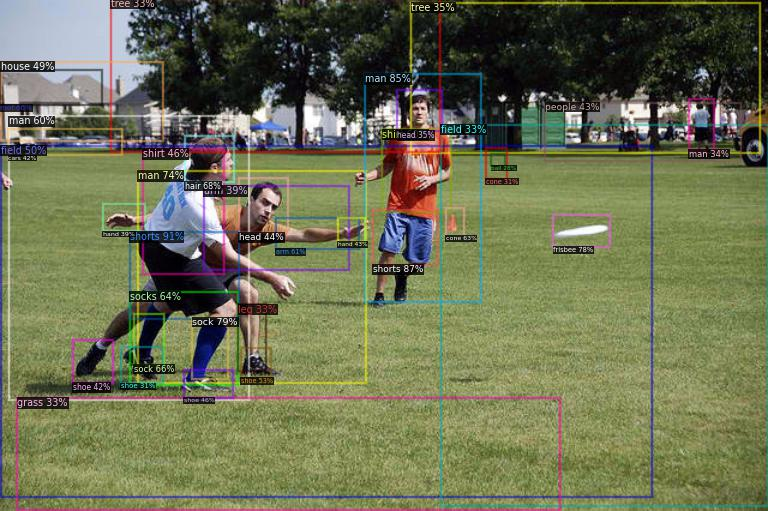

In [ ]:
pred = predictions.to('cpu')
v = Visualizer(im[:, :, :], MetadataCatalog.get("vg"), scale=1.2)
v = v.draw_instance_predictions(pred)

a = v.get_image()[:, :, ::-1]

showarray(a)

In [ ]:
bboxes = predictions.pred_boxes
best_attentions = torch.load("frisbee_attentions.pt")
best_sequence = torch.load("frisbee_sequence.pt")
print(bboxes)
print(best_attentions[0])
print(best_sequence)

Boxes(tensor([[1.0803e+02, 1.9400e+02, 1.9917e+02, 2.6658e+02],
        [3.1045e+02, 1.7552e+02, 3.6478e+02, 2.2151e+02],
        [3.0415e+02, 6.2796e+01, 4.0083e+02, 2.5250e+02],
        [1.6028e+02, 2.6526e+02, 1.9015e+02, 3.1643e+02],
        [4.6101e+02, 1.7958e+02, 5.0868e+02, 2.0665e+02],
        [1.1490e+02, 1.4333e+02, 3.0537e+02, 3.1967e+02],
        [1.5423e+02, 1.1405e+02, 1.9502e+02, 1.5212e+02],
        [2.2560e-01, 5.9090e+01, 8.4985e+01, 8.8559e+01],
        [1.1128e+02, 2.6255e+02, 1.3685e+02, 3.0431e+02],
        [1.0794e+02, 2.4356e+02, 1.9802e+02, 3.2117e+02],
        [3.7132e+02, 1.7385e+02, 3.8668e+02, 1.9729e+02],
        [2.3002e+02, 1.8279e+02, 2.9924e+02, 2.0833e+02],
        [3.1874e+02, 1.0870e+02, 3.7555e+02, 1.7720e+02],
        [7.0993e+00, 9.7834e+01, 2.0761e+02, 3.3363e+02],
        [2.0058e+02, 2.9020e+02, 2.2562e+02, 3.1553e+02],
        [7.8409e-01, 1.2239e+02, 5.4368e+02, 4.1437e+02],
        [9.5020e-01, 5.2426e+01, 1.3594e+02, 1.1812e+02],
        

In [ ]:
import matplotlib.cm as cm
import numpy as np
import skimage
import skimage.transform
import cv2

from PIL import Image

cmap = cm.get_cmap('jet')
cmap.set_bad(color="k", alpha=0.0)

In [ ]:
def attention_bbox_interpolation(im, bboxes, att):
    softmax = att
    assert len(softmax) == len(bboxes)

    img_h, img_w = im.shape[:2]
    opacity = np.zeros((img_h, img_w), np.float32)
    for bbox, weight in zip(bboxes, softmax):
        x1, y1, x2, y2 = bbox
        opacity[int(y1):int(y2), int(x1):int(x2)] += weight.item()
    opacity = np.minimum(opacity, 1)

    opacity = opacity[..., np.newaxis]
    
    vis_im = np.array(PIL.Image.fromarray(cmap(opacity, bytes=True), 'RGBA'))
    vis_im = vis_im.astype(im.dtype)
    vis_im = cv2.addWeighted(im, 0.7, vis_im, 0.5, 0)
    vis_im = vis_im.astype(im.dtype)
    
    return vis_im


In [ ]:
def visualize_pred(im, boxes, att_weights):
    im = cv2.cvtColor(im, cv2.COLOR_RGB2RGBA)
    b,g,r,a = cv2.split(im)           # get b, g, r
    im = cv2.merge([r,g,b,a])

    M = min(len(boxes), len(att_weights))
    im_ocr_att = attention_bbox_interpolation(im, boxes[:M], att_weights[:M])
    plt.imshow(im_ocr_att, alpha = 0.8)

In [ ]:
with open('WORDMAP_coco_5_cap_per_img_5_min_word_freq.json', 'r') as j:
    mapping = json.load(j)
reverse_mapping = {value: key  for key, value in mapping.items()}

In [ ]:
def visualize_att(image_path, best_sequence, best_attentions, bboxes, reverse_mapping):
    
    image = Image.open(image_path)
    image = image.resize([14 * 24,  14* 24], Image.LANCZOS)
    words = [reverse_mapping[ind] for ind in best_sequence]
    for t in range(len(words)):
        plt.text(0, 1, '%s' % (words[t]), color='black', backgroundcolor='white', fontsize=15)
        attention = best_attentions[t]
        visualize_pred(im, bboxes, attention)
        plt.set_cmap(cm.Greys_r)
        plt.axis('off')
        plt.show()

    

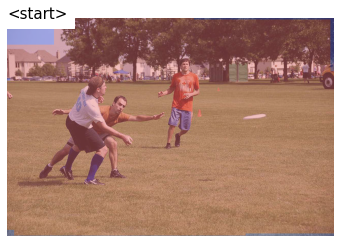

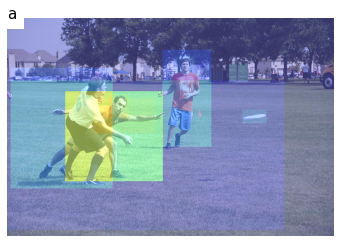

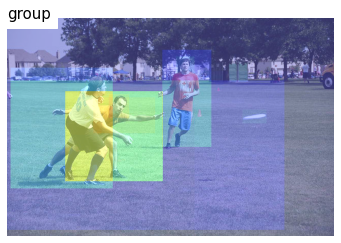

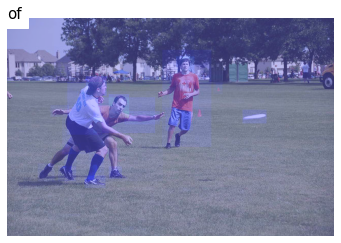

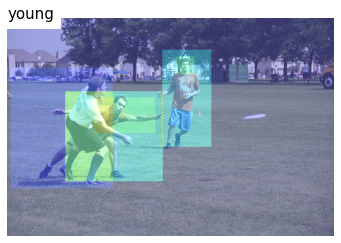

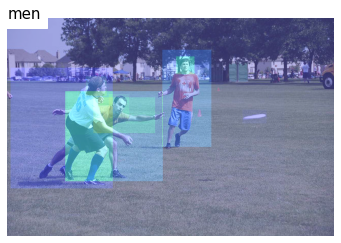

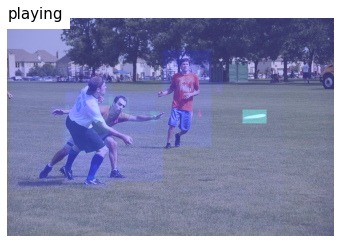

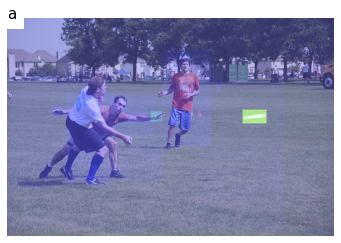

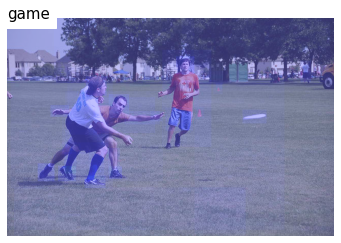

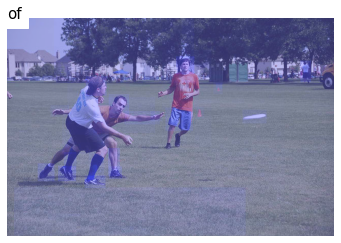

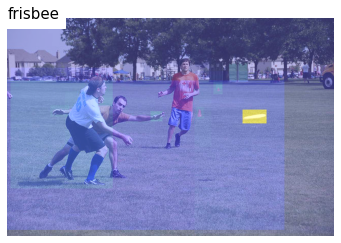

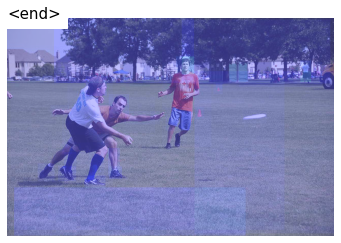

In [ ]:
visualize_att(IMG_FILE, best_sequence, best_attentions, bboxes, reverse_mapping)